#Exercises: Integration, Cointegration, and Stationarity - Answer Key
by Delaney Granizo-Mackenzie and Maxwell Margenot

## Lecture Link :
https://www.quantopian.com/lectures/integration-cointegration-and-stationarity

###IMPORTANT NOTE: 
This lecture corresponds to the Integration, Cointegration, and Stationarity lecture, which is part of the Quantopian lecture series. This homework expects you to rely heavily on the code presented in the corresponding lecture. Please copy and paste regularly from that lecture when starting to work on the problems, as trying to do them from scratch will likely be too difficult.

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)
----

## Helper Functions

In [1]:
# Useful Functions
def check_for_stationarity(X, cutoff=0.01):
    # H_0 in adfuller is unit root exists (non-stationary)
    # We must observe significant p-value to convince ourselves that the series is stationary
    pvalue = adfuller(X)[1]
    if pvalue < cutoff:
        print 'p-value = ' + str(pvalue) + ' The series is likely stationary.'
        return True
    else:
        print 'p-value = ' + str(pvalue) + ' The series is likely non-stationary.'
        return False
    
def generate_datapoint(params):
    mu = params[0]
    sigma = params[1]
    return np.random.normal(mu, sigma)

In [2]:
# Useful Libraries
import numpy as np
import pandas as pd

import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

import matplotlib.pyplot as plt

----

#Exercise 1: Stationarity Testing

##a. Checking For Stationarity

Check whether the following series is stationary using the tests from the lecture.

In [3]:
QQQ = get_pricing("QQQ", start_date='2014-1-1', end_date='2015-1-1', fields='price')
QQQ.name = QQQ.name.symbol

check_for_stationarity(QQQ)

p-value = 0.83074729803 The series is likely non-stationary.


False

## b. Checking for Normality

As an extra all-purpose check, and one that is often done on series, check whether the above series is normally distributed using the Jarque-Bera test.

In [4]:
from statsmodels.stats.stattools import jarque_bera

jarque_bera(QQQ)

(16.77608340090589,
 0.00022757249739878912,
 0.2415274043817217,
 1.8319331010647477)

##c. Constructing Examples I

Create/provide a series that is stationary and different from any covered so far in the exercise or the lecture.

In [5]:
X = np.random.normal(0, 1, 100)

check_for_stationarity(X)

p-value = 8.15924515037e-16 The series is likely stationary.


True

##d. Constructing Examples II

Create/provide a series that is non-stationary and different from any covered so far in the exercise or the lecture.

In [6]:
# Set the number of datapoints
T = 100

B = pd.Series(index=range(T))
B.name = 'B'

for t in range(T):
    # Now the parameters are dependent on time
    # Specifically, the mean of the series changes over time
    params = (np.power(t, 2), 1)
    B[t] = generate_datapoint(params)

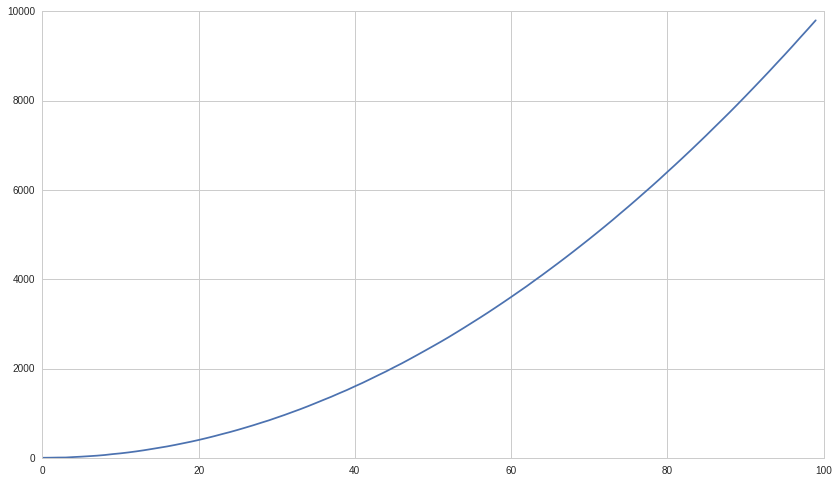

In [7]:
plt.plot(B);

In [8]:
check_for_stationarity(B)

p-value = 0.964313099004 The series is likely non-stationary.


False

----

# Exercise 2: Estimate Order of Integration

Use the techniques laid out in the lecture notebook to estimate the order of integration for the following timeseries.

In [9]:
QQQ = get_pricing("QQQ", start_date='2014-1-1', end_date='2015-1-1', fields='price')
QQQ.name = QQQ.name.symbol

# Write code to estimate the order of integration of QQQ.
# Feel free to sample from the code provided in the lecture.

p-value = 2.93736515664e-28 The series is likely stationary.


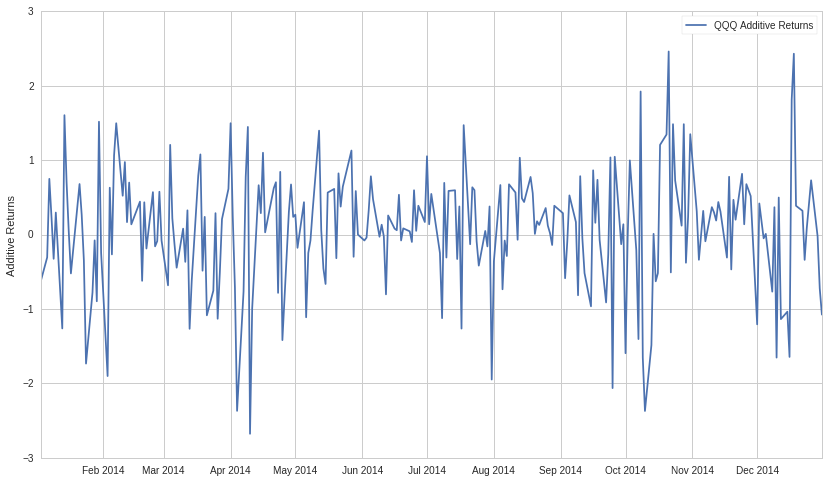

In [10]:
QQQ = QQQ.diff()[1:]
QQQ.name = QQQ.name + ' Additive Returns'
check_for_stationarity(QQQ)
plt.plot(QQQ.index, QQQ.values)
plt.ylabel('Additive Returns')
plt.legend([QQQ.name]);

----

#Exercise 3: Find a Stationary Linear (Cointegrated) Combination

Use the techniques laid out in the lecture notebook to find a linear combination of the following timeseries that is stationary.

In [11]:
T = 500

X1 = pd.Series(index=range(T))
X1.name = 'X1'

for t in range(T):
    # Now the parameters are dependent on time
    # Specifically, the mean of the series changes over time
    params = (t * 0.1, 1)
    X1[t] = generate_datapoint(params)

X2 = np.power(X1, 2) + X1
X3 = np.power(X1, 3) + X1
X4 = np.sin(X1) + X1

# We now have 4 time series, X1, X2, X3, X4
# Determine a linear combination of the 4 that is stationary over the 
# time period shown using the techniques in the lecture.

In [12]:
X1 = sm.add_constant(X1)
results = sm.OLS(X4, X1).fit()

# Get rid of the constant column
X1 = X1['X1']

results.params

const    0.017736
X1       0.997973
dtype: float64

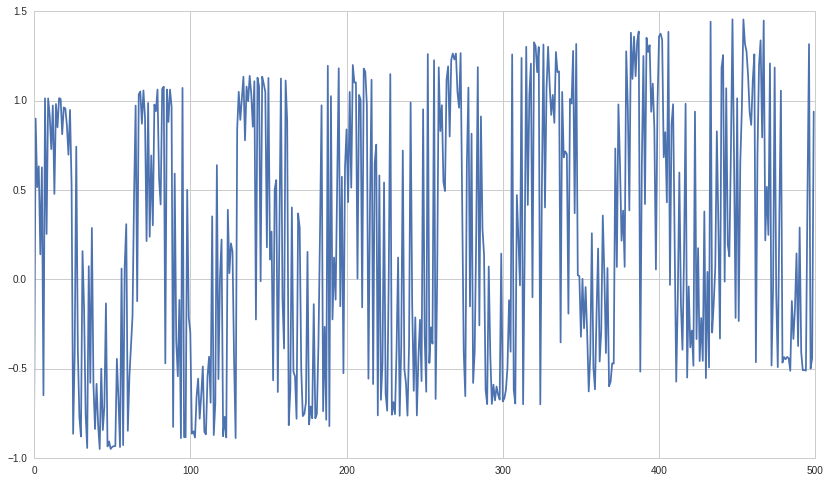

In [13]:
plt.plot(X4-0.99 * X1);

In [14]:
check_for_stationarity(X4 - 0.99*X1)

p-value = 7.40184822771e-07 The series is likely stationary.


True

---

Congratulations on completing the Integration, Cointegration, and Stationarity answer key!

As you learn more about writing trading models and the Quantopian platform, enter the daily [Quantopian Contest](https://www.quantopian.com/contest). Your strategy will be evaluated for a cash prize every day.

Start by going through the [Writing a Contest Algorithm](https://www.quantopian.com/tutorials/contest) tutorial.

*This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company.  In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.*